In [1]:
# testing BayLIME on images
# based on https://github.com/x-y-zhao/BayLime/blob/master/BayLIME_tutorial_images.ipynb
# Tatsuo Okubo
# 2021/11/06

In [2]:
from BayLime.lime import lime_image

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_ubyte
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

In [5]:
tf.__version__

'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
inet_model = tf.keras.applications.InceptionV3(weights="imagenet")  # load weights from a model pre-trained on ImageNet

2021-11-06 15:08:27.049220: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-06 15:08:27.049399: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-06 15:08:27.049834: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        out.append(x)
    return np.vstack(out)

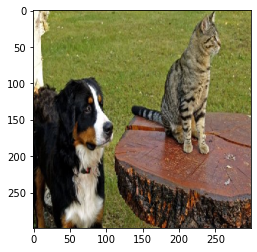

2021-11-06 15:08:29.679853: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-06 15:08:29.699723: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3699850000 Hz


('n02107683', 'Bernese_mountain_dog', 0.6825602)
('n02107908', 'Appenzeller', 0.037938636)
('n02108000', 'EntleBucher', 0.015411664)
('n02107574', 'Greater_Swiss_Mountain_dog', 0.014435489)
('n02102040', 'English_springer', 0.0015393256)


In [9]:
images = transform_img_fn([os.path.join('BayLime', 'data','dogs.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

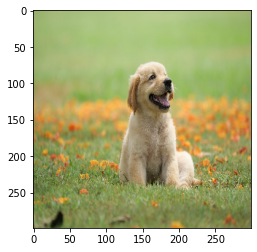

('n02099601', 'golden_retriever', 0.759178)
('n02099712', 'Labrador_retriever', 0.13248338)
('n02102318', 'cocker_spaniel', 0.015282833)
('n02101556', 'clumber', 0.014689326)
('n02104029', 'kuvasz', 0.0038136768)


In [10]:
images = transform_img_fn([os.path.join('BayLime', 'data','5.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

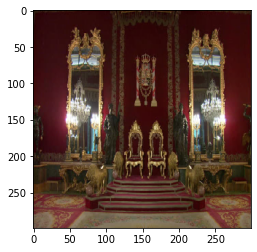

('n04429376', 'throne', 0.9483307)
('n02699494', 'altar', 0.0037875313)
('n03028079', 'church', 0.0036688438)
('n02791124', 'barber_chair', 0.003418636)
('n02791270', 'barbershop', 0.0019843106)


In [11]:
images = transform_img_fn([os.path.join('BayLime', 'data','throne.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

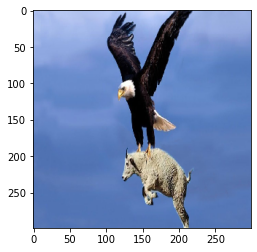

('n01614925', 'bald_eagle', 0.59443027)
('n01608432', 'kite', 0.02128781)
('n02106166', 'Border_collie', 0.004580042)
('n03937543', 'pill_bottle', 0.002907968)
('n02105412', 'kelpie', 0.0021812443)


In [12]:
images = transform_img_fn([os.path.join('BayLime', 'data','eagle_sheep.jpg')])
plt.imshow(images[0] / 2 + 0.5)
plt.show()
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [13]:
preds[0].shape

(1000,)

In [14]:
# make sure to convert float to double
image_uint = img_as_ubyte(images)
image_uint.dtype

dtype('uint8')

In [15]:
def predict_fn(images):
    return session.run(probabilities, feed_dict={processed_images: images})

## Original LIME 

/home/tatsuo/Python/interpretable-citrus/BayLime/lime/wrappers/scikit_image.py:118: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


the number of features: 122


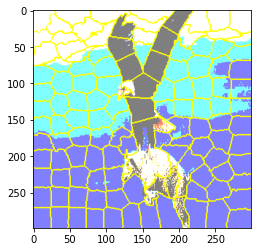

  0%|          | 0/200 [00:00<?, ?it/s]

using non_Bay option for model regressor
using non_Bay option for model regressor
using non_Bay option for model regressor


In [16]:
explainer = lime_image.LimeImageExplainer(feature_selection='none')#kernel_width=0.1
explanation = explainer.explain_instance(image_uint[0], inet_model.predict,
                                         top_labels=3, hide_color=0, batch_size=10,
                                         num_samples=200, model_regressor='non_Bay')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


For feature of segment 41
The mean of the (posterior) coefficient 0.39601907587338225
The variance of the (posterior) coefficient 0.0
For feature of segment 3
The mean of the (posterior) coefficient 0.23469266179937398
The variance of the (posterior) coefficient 0.0
For feature of segment 22
The mean of the (posterior) coefficient -0.14066604166368157
The variance of the (posterior) coefficient 0.0
For feature of segment 14
The mean of the (posterior) coefficient -0.1285786883246196
The variance of the (posterior) coefficient 0.0
For feature of segment 59
The mean of the (posterior) coefficient 0.1257848940555749
The variance of the (posterior) coefficient 0.0
For feature of segment 8
The mean of the (posterior) coefficient -0.12075587783464754
The variance of the (posterior) coefficient 0.0
For feature of segment 6
The mean of the (posterior) coefficient -0.114553686293134
The variance of the (posterior) coefficient 0.0
For feature of segment 83
The mean of the (posterior) coefficient

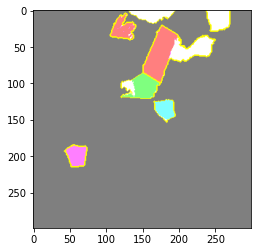

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


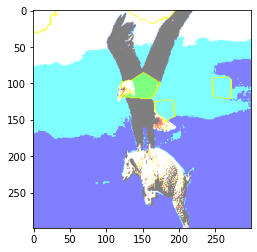

[('41', 0.39601907587338225), ('3', 0.23469266179937398), ('22', -0.14066604166368157), ('14', -0.1285786883246196), ('59', 0.1257848940555749), ('8', -0.12075587783464754), ('6', -0.114553686293134), ('83', -0.1072669515532798), ('30', -0.10554602422632164), ('20', -0.10422459663671232), ('51', -0.10323985704833678), ('0', 0.10221591856510122), ('47', 0.10131119814062464), ('13', -0.09956238602537286), ('62', 0.0982653069172139), ('88', -0.09824771088310844), ('93', -0.09701204491404773), ('95', -0.0967500411691473), ('40', -0.0943299804288514), ('90', 0.0903325655579829), ('114', 0.08886683855190212), ('105', -0.08871382057509183), ('35', 0.08728303895824838), ('76', -0.08221235272991112), ('15', 0.08121270172036671), ('42', 0.07672476963436188), ('64', 0.07654718518208752), ('116', 0.07391922430235898), ('55', 0.07203326123596143), ('110', -0.07074456265084872), ('77', -0.06855581632125592), ('96', -0.06721574377973255), ('98', 0.0670367895063162), ('7', 0.06625004568633759), ('32',

In [18]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

print(explanation.as_list(explanation.top_labels[0]))

## BayLIME with non-informative prior

/home/tatsuo/Python/interpretable-citrus/BayLime/lime/wrappers/scikit_image.py:118: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  return self.target_fn(args[0], **self.target_params)


the number of features: 114


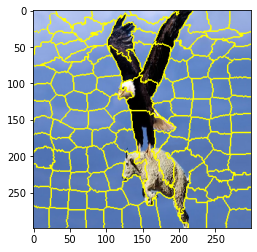

  0%|          | 0/200 [00:00<?, ?it/s]

using Bay_non_info_prior option for model regressor
Convergence after  10  iterations
the alpha is 50.29124319209862
the lambda is 397.4179742762785
the regulation term lambda/alpha is 7.902329492199108


In [19]:
explanation = explainer.explain_instance(images[0], inet_model.predict,
                                         top_labels=1, hide_color=0, batch_size=10,
                                         num_samples=200,model_regressor='Bay_non_info_prior')
#'non_Bay' 'Bay_non_info_prior' 'Bay_info_prior','BayesianRidge_inf_prior_fit_alpha'

For feature of segment 42
The mean of the (posterior) coefficient 0.2898657681547912
The variance of the (posterior) coefficient 0.0008903877461862693
For feature of segment 41
The mean of the (posterior) coefficient 0.13473919746043037
The variance of the (posterior) coefficient 0.0009193915353536336
For feature of segment 61
The mean of the (posterior) coefficient 0.09659941278401198
The variance of the (posterior) coefficient 0.0009259414475232329
For feature of segment 75
The mean of the (posterior) coefficient -0.09532088489295337
The variance of the (posterior) coefficient 0.0008333461494903116
For feature of segment 74
The mean of the (posterior) coefficient -0.06742337345391239
The variance of the (posterior) coefficient 0.0009101275714637843


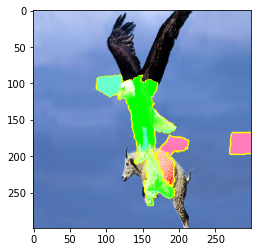

[('42', 0.2898657681547912), ('41', 0.13473919746043037), ('61', 0.09659941278401198), ('75', -0.09532088489295337), ('74', -0.06742337345391239), ('107', 0.05795203344801725), ('78', -0.049645233818124315), ('90', -0.04732987069871157), ('28', 0.04665624914264803), ('62', 0.04582385452814603), ('113', 0.045142890580210766), ('82', -0.04464204330332452), ('92', -0.04205533695505634), ('83', -0.04088420240004561), ('31', 0.03992500115879027), ('85', -0.039326092748610514), ('80', 0.03847207446609362), ('57', 0.03843952226931305), ('50', 0.0381922579853136), ('12', -0.037701492191758945), ('4', 0.03717313413909271), ('29', 0.03673690349937334), ('39', 0.0351852409237213), ('16', 0.03515560854839889), ('47', -0.03364567503905653), ('35', -0.03309007063647508), ('65', -0.032439959920421965), ('51', 0.031763110901344406), ('46', -0.031512236194705265), ('56', -0.03116823829159976), ('33', -0.030700629274323106), ('106', -0.030277525489487034), ('8', -0.030053035107599747), ('105', -0.029436

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

print(explanation.as_list(explanation.top_labels[0]))